In [1]:
import matplotlib.pyplot as plt
from scipy import io
import numpy as np

In [10]:
def plot_data( T_final, dt, folder_path, show_other=True, flag='br', show_plot=1, lw=0.1):
    t1 = np.arange(0, T_final + dt, dt)
    t2 = np.arange(0, T_final + 5 * dt, 5 * dt)
    if flag == 'br':
        baseline_f = '../baseline/basic_rbf/'
        res_f = 'online_rbf/'
    if show_other:
        mat_b = io.loadmat(baseline_f + 'basic.mat')
#         mat_lstm = io.loadmat(res_f + 'lstm_dm32_el2_sl5_pl3_co2_bs32_bfs32_lr0.0001_stlog'+'/data.mat')
#         #itf_dm64_el2_sl5_pl1_co2_bs8_bfs32_lr0.0001_stlog #141
#         #itf_dm32_el2_sl5_pl1_co2_bs32_bfs32_lr0.0001_stlog #0.18
#         # to_train100/itf_dm32_el1_sl5_pl1_co2_bs8_bfs32_lr5e-05_stlog
#         mat_itf = io.loadmat(res_f + 'itf_dm32_el2_sl5_pl3_co2_bs32_bfs32_lr0.0001_stlog'+'/data.mat')
#         mat_itf_s = io.loadmat(res_f + 'itf_dm32_el2_sl5_pl3_co2_bs32_bfs33_lr0.001_stlog'+'/data.mat')
#         all_mat = [mat_b, mat_lstm, mat_itf, mat_itf_s][:3]  # [mat_b, mat_offset]
#         labels = ['basic','lstm','itf', 'itf_s'][:3]   # ['basic', 'offset']

        mat_linear = io.loadmat(res_f + 'lstm_dm32_el2_sl5_pl1_co2_bs32_bfs65_lr0.001_stlog'+'/data.mat')
        #itf_dm64_el2_sl5_pl1_co2_bs8_bfs32_lr0.0001_stlog #141
        #itf_dm32_el2_sl5_pl1_co2_bs32_bfs32_lr0.0001_stlog #0.18
        # to_train100/itf_dm32_el1_sl5_pl1_co2_bs8_bfs32_lr5e-05_stlog
        mat_new = io.loadmat(res_f + 'itf_dm32_el2_sl5_pl1_co2_bs32_bfs65_lr0.001_stlog'+'/data.mat')
        all_mat = [mat_b, mat_linear, mat_new]  # [mat_b, mat_offset]
        labels = ['basic','lstm','new']  # ['basic', 'offset']



    plt.figure(1, figsize=(12, 8))

    plt.subplot(221)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t1, all_mat[i]['Data_SS_Log'][:, 0], linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')

    plt.subplot(222)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t1, all_mat[i]['Data_SS_Log'][:, 1], linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')

    plt.subplot(223)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t1, all_mat[i]['Data_SS_Log'][:, 2], linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')

    plt.subplot(224)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t1, all_mat[i]['Data_SS_Log'][:, 3], linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')
    plt.savefig(folder_path + '1_.svg', format='svg')

    
    qd3 = mat_b['qd3']
    qd4 = mat_b['qd4']
    dqd3 = mat_b['dqd3']
    dqd4 = mat_b['dqd4']

    plt.figure(2, figsize=(12, 8))

    plt.subplot(221)
    # a = np.random.rand(12000, 1)
    # b = np.random.rand(12000)
    # c = a - b
    # c.shape c是（12000,12000），这里会导致数据爆炸
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t2, np.abs(qd3.reshape(-1) - all_mat[i]['q3_12001'].reshape(-1)) * 180 / np.pi, linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')

    plt.subplot(222)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t2, np.abs(qd4.reshape(-1) - all_mat[i]['q4_12001'].reshape(-1)) * 180 / np.pi, linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')

    plt.subplot(223)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t2, np.abs(dqd3.reshape(-1) - all_mat[i]['dq3_12001'].reshape(-1)), linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')

    plt.subplot(224)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t2, np.abs(dqd4.reshape(-1) - all_mat[i]['dq4_12001'].reshape(-1)), linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')
    plt.savefig(folder_path + '2_.svg', format='svg')
    

    plt.figure(3, figsize=(12, 8))
    plt.subplot(221)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t2, all_mat[i]['Data_Tau_Log'][:, 0], linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')

    plt.subplot(222)
    if show_other:
        for i in range(len(all_mat)):
            plt.plot(t2, all_mat[i]['Data_Tau_Log'][:, 1], linewidth=lw, label=labels[i])
    plt.legend(loc='upper right', fontsize='small')
    plt.savefig(folder_path + '3_.svg', format='svg')
    if show_plot:
        plt.show()
    plt.clf()

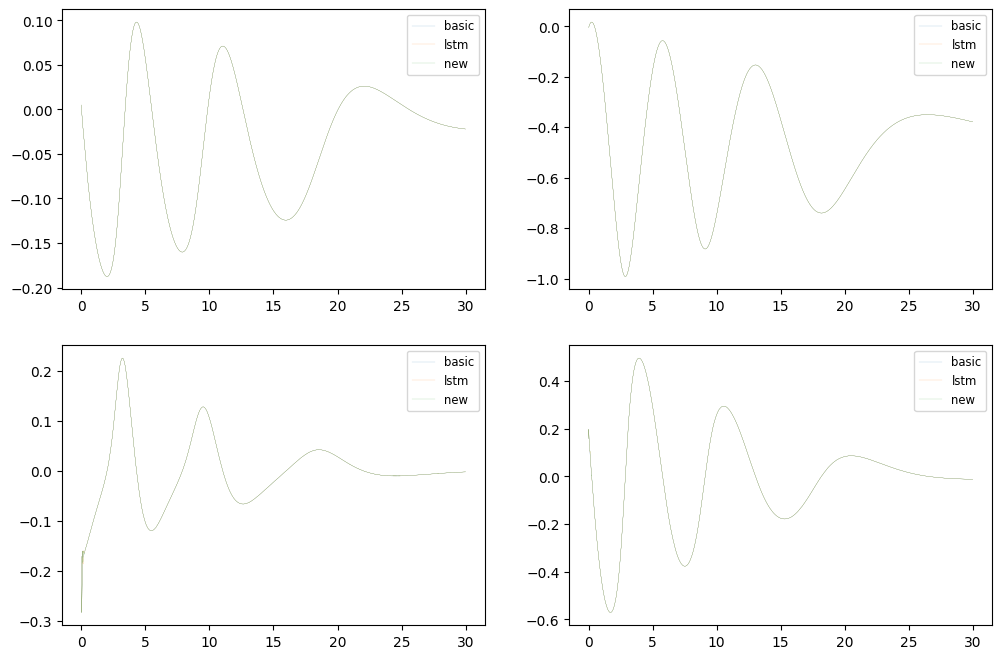

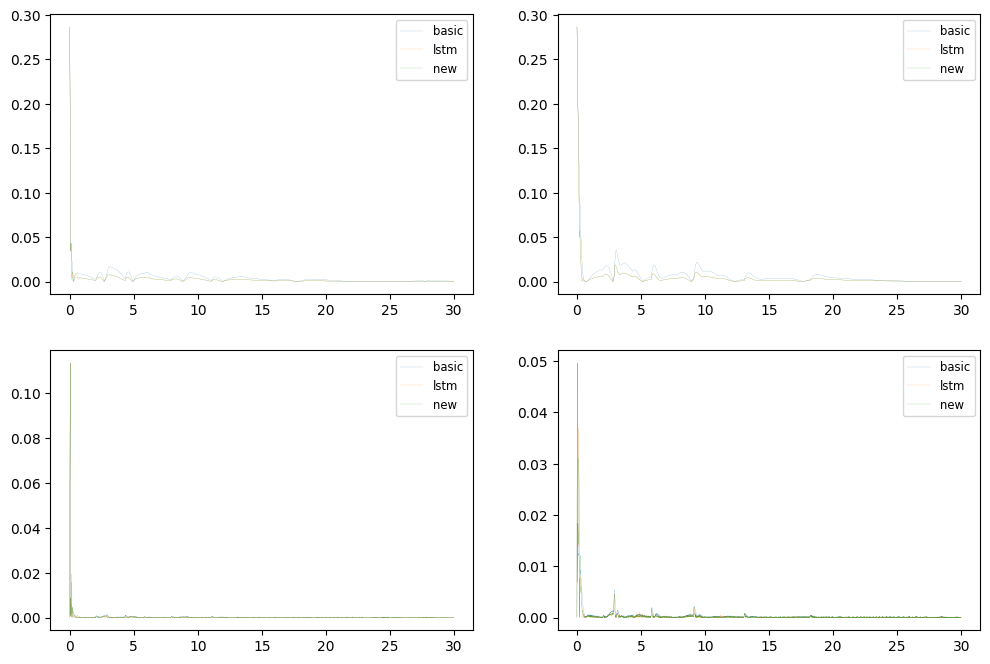

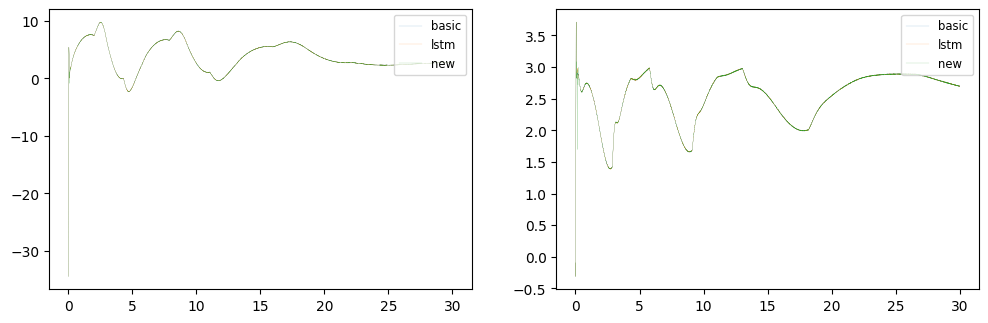

<Figure size 640x480 with 0 Axes>

In [11]:
T_final = 30
dt = 0.0005
folder_path='online_rbf_plot/'
plot_data( T_final, dt, folder_path, show_other=True, flag='br', show_plot=1)

In [13]:
a = [1,2,3]
print((1) in a)
print((1,4) in a)
print((1,2) in a)

True
False
False


In [14]:
b = [(1,2)]
print((1,2) in b)

True
